# ML Assignment 4 :-
# Q11 : Optical Character Recognition using Fully Connected Neural Network

Python Coding Assignment: Optical Character Recognition using Fully Connected Neural Network Tasks: 
1. Data Loading: 

    • Load the provided dataset of labeled character images for training and testing. 

    • Ensure the dataset is correctly formatted with input images and corresponding labels.

2. Model Architecture:

    • Define a fully connected neural network model using a Python deep learning library (e.g., TensorFlow or PyTorch).

    • Design the architecture with the following specifications: 

    • Input layer: Flattened image input (e.g., 28x28 pixels for grayscale images).

    • Hidden layers: At least one hidden layer with a customizable number of neurons and activation function (e.g., ReLU).

    • Output layer: Softmax activation for multiclass classification (one neuron per class).

3. Training: 

    • Train the neural network model using the provided training dataset.

    • Configure the training process with parameters such as batch size, learning rate, and number of epochs.

    • Monitor the training progress by tracking metrics such as loss and accuracy.

4. Evaluation: 

    • Evaluate the trained model's performance on the separate test dataset.

    • Calculate metrics such as accuracy, precision, recall, and F1-score to assess the model's effectiveness in character recognition.

5. Visualization:

    • Visualize sample input images along with their predicted labels to demonstrate the model's predictions.

    • Plot training and validation curves to visualize the learning progress and detect any overfitting or underfitting issues.
    Deliverables:

    • Python script or Jupyter Notebook containing the implementation of the fully connected neural network for OCR.


    • README file explaining the dataset, model architecture, training procedure, evaluation metrics, and any additional insights.

    • Trained model weights file (if applicable) for further testing and deployment. Dataset:

    • Please use EMNIST Letters: 145,600 characters. 26 balanced classes from https://www.nist.gov/itl/products-and-services/emnist-dataset

    • Use an 80% training and 20% testing split and show all your results in terms of 5-fold cross-validation.

#### Name : Sharanya Dasgupta
#### Roll No. : CS2320

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import keras
import tensorflow

In [ ]:
# Loading Dataset
df_train = pd.read_csv('emnist-letters-train.csv', header=None)
df_test = pd.read_csv('emnist-letters-test.csv', header=None)

In [ ]:
# Splitting X and y values for test set and train set

matrix_train = df_train.values
matrix_test = df_test.values

y_train, X_train, y_test, X_test = matrix_train[:, 0], matrix_train[:,1:], matrix_test[:, 0], matrix_test[:,1:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(88800, 784)
(14800, 784)
(88800,)


In [ ]:
# Reshaping

X_train = X_train.reshape(88800,28,28)
X_test = X_test.reshape(14800,28,28)

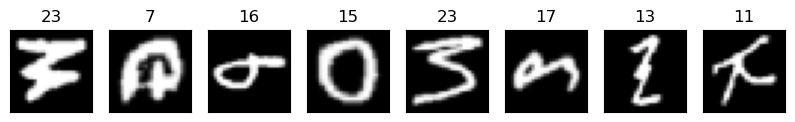

In [ ]:
# Display some images

fig, axes = plt.subplots(ncols=8, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(8):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Convert y_train and y_test into one-hot format

temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=27))
y_train = np.array(temp)
y_train = y_train[:, 1:]

# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=27))
y_test = np.array(temp)
y_test = y_test[:, 1:]

In [ ]:
print(y_train.shape)
print(y_test.shape)

(88800, 26)
(14800, 26)


In [ ]:
# Model Architecture

def create_model(input_shape, num_classes, num_neurons=128):
    model = Sequential([
        Flatten(input_shape=input_shape),  # Input layer: Flatten the image input
        Dense(num_neurons, activation='relu'),  # Hidden layer with ReLU activation
        Dense(num_classes, activation='softmax')  # Output layer with softmax activation
    ])
    return model

# Usage:
input_shape = (28, 28)  # Input shape for 28x28 images
num_classes = 26  # Number of classes (letters A-Z)
num_neurons = 128  # Number of neurons in the hidden layer

# Creating the model
model = create_model(input_shape, num_classes, num_neurons)

# Print model summary
model.summary()

C:\Users\shara\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,834 (405.60 KB)

 Trainable params: 103,834 (405.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# Model Training

history = model.fit(X_train, y_train, epochs=50,
          validation_data=(X_test,y_test))

Epoch 1/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.2140 - loss: 9.4499 - val_acc: 0.4353 - val_loss: 1.9694
Epoch 2/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.5034 - loss: 1.7221 - val_acc: 0.4931 - val_loss: 1.6599
Epoch 3/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.5745 - loss: 1.4290 - val_acc: 0.5591 - val_loss: 1.5058
Epoch 4/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6148 - loss: 1.3245 - val_acc: 0.5633 - val_loss: 1.4824
Epoch 5/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6325 - loss: 1.2667 - val_acc: 0.5948 - val_loss: 1.3849
Epoch 6/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6444 - loss: 1.2348 - val_acc: 0.5658 - val_loss: 1.3935
Epoch 7/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6507 - loss: 1.2124 - val_acc: 0.6255 - val_loss: 1.3270
Epoch 8/50
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6530 - loss: 1.2020 - val_acc: 0.5799 - val_loss: 1.4192
Epoch 9/50
2775/2775 ━━━━━━━━━━━

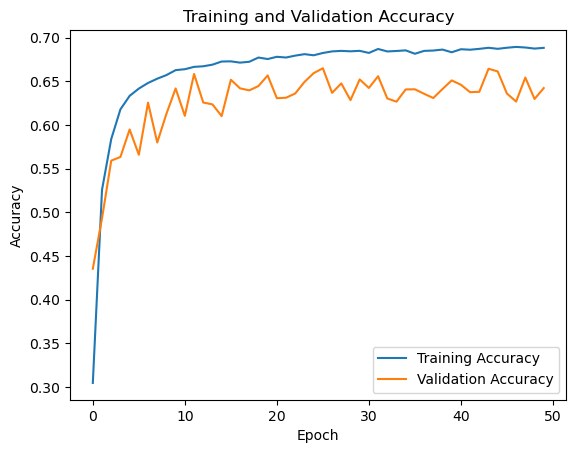

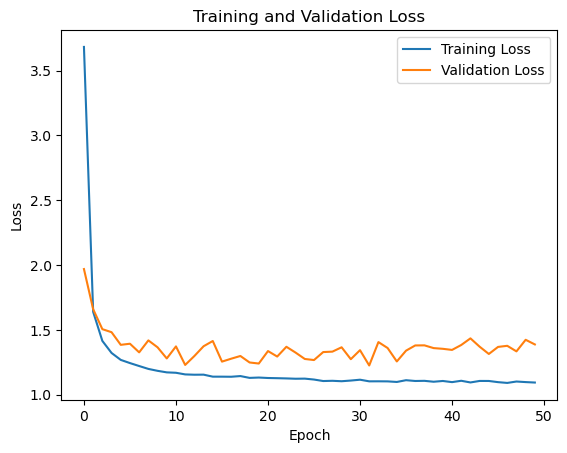

In [ ]:
# Plot training and validation accuracy curves

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluation on the separate test dataset

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

from sklearn.metrics import classification_report

# Convert one-hot encoded true labels to class labels if needed
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Calculate classification report
report = classification_report(y_test_labels, predictions)

print("Classification Report:")
print(report)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.62      0.46       800
           1       0.74      0.80      0.77       800
           2       0.84      0.63      0.72       800
           3       0.79      0.63      0.70       800
           4       0.70      0.75      0.72       800
           5       0.90      0.74      0.81       800
           6       0.61      0.33      0.43       800
           7       0.49      0.58      0.53       800
           8       0.59      0.19      0.29       800
           9       0.92      0.71      0.80       800
          10       0.67      0.62      0.64       800
          11       0.51      0.81      0.63       800
          12       0.85      0.83      0.84       800
          13       0.92      0.42      0.57       800
          14       0.79      0.80      0.80       800
          15       0.75      0.90      0.82       800
          16     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


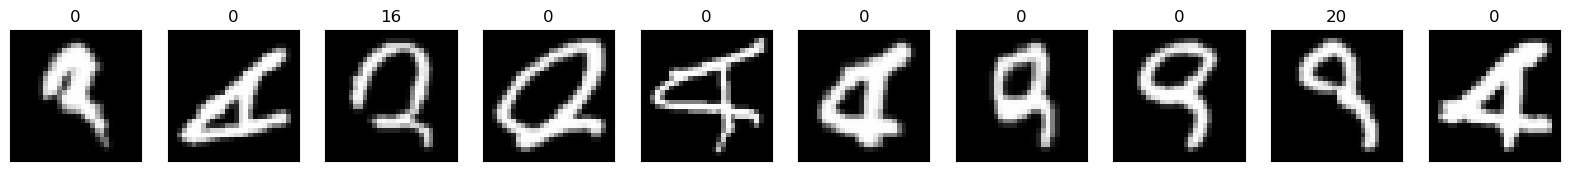

In [ ]:
# Visualization

fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Optical Character Recognition using Fully Connected Neural Network

## Overview

This project implements an Optical Character Recognition (OCR) system using a Fully Connected Neural Network (FCNN) with the EMNIST Letters dataset. The goal is to recognize handwritten letters and classify them into one of 26 classes (A-Z).

## Dataset

### EMNIST Letters

The EMNIST Letters dataset is a set of handwritten characters derived from the NIST Special Database and converted to a 28x28 pixel image format. The dataset contains 1,03,600 characters and is balanced across 26 classes (letters A-Z).
88800, 26)
(14800,

- **Training set**: 88,800 samples
- **Test set**: 14,800 samples

Each sample is a grayscale image of size 28x28 pixels, and the labels are the corresponding letter classes.

## Model Architecture

The Fully Connected Neural Network (FCNN) is implemented using keras. The architecture is as follows:

1. **Input Layer**: Flattened image input of size 28x28 pixels (784 features).
2. **Hidden Layer**: Dense layer with 128 neurons and ReLU activation function.
3. **Output Layer**: Dense layer with 26 neurons and softmax activation function for multiclass classification.

## Training Procedure

1. **Data Loading**: The EMNIST Letters dataset is loaded from csv file that is downloaded already and split into training and testing sets.
2. **Model Compilation**: The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.
3. **Model Training**: The model is trained using the training dataset with the following parameters:
   - Number of epochs: 50
5. **Model Evaluation**: The model's performance is evaluated on the test dataset using metrics such as accuracy, precision, recall, and F1-score.

## Evaluation Metrics

The trained model is evaluated on the test dataset using the following metrics:

- **Accuracy**: The percentage of correctly classified samples.
- **Precision**: The ratio of true positive predictions to the total positive predictions.
- **Recall**: The ratio of true positive predictions to the total actual positives.
- **F1-Score**: The harmonic mean of precision and recall.

## Visualization

1. **Sample Predictions**: Sample input images along with their predicted labels are visualized to demonstrate the model's predictions.
2. **Training and Validation Curves**: The training and validation accuracy and loss curves are plotted to visualize the learning progress and detect any overfitting or underfitting issues.
